# Practical Machine Learning for Physicists
## Coursework C - Part 2


For both of these tasks we want you to implement autoencoder networks that:
- Train on randomly generated circles (using the circle_generator function below)
- Use 27x27 pixel images
- Use no more than 30,000 randomly generated samples (e.g. batchsize 30 and 1000 steps, or batchsize 1000 and 30 steps, or anywhere inbetween) in training the final networks for each task
- Use the mean_squared_error loss function
- Fulfil the network size requirement listed in the task (can be verifired using the print_layers function, after the network is partially trained)

### Task 1:
Implement any network design, but the bottleneck must contain no more than 9 neurons.

### Task 2:
Implement any network design, but the bottleneck must contain no more than 3 neurons.



#### Practicalities
You should use this notebook for your work and upload it to  Moodle. You are expected to use TensorFlow and Keras to complete these tasks. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Task 1 performance (0.02 is a good target cost to do better than)
- Task 2 performance ( a good target here is left for the student to determine)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.15.0


In [ ]:
#A big messy function to do the training
# model -- our keras neural model autoencoder
# image_generator -- a function to generate random images for the training (see below for examples)
# img_size -- the size of our image in pixels
# batchsize -- the number of images to include in each training batch
# steps -- the number of steps taken in the training
#
# returns an array of the costs
def generate_and_train(model,image_generator,img_size,batchsize,steps):

    #Generate an array of the numbers 1 to img_size and create a meshgrid from them
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)

    #Now create a test image using 1 call to image_generator
    #y_test=np.zeros([1,pixels,pixels,1])
    #y_test[:,:,:,0]=image_generator(1,x,y)

    #Now create the empty arrays for the images and cost
    y_in=np.zeros([batchsize,img_size,img_size,1])
    y_target=np.zeros([batchsize,img_size,img_size,1])
    cost=np.zeros(steps)

    #Loop through the steps, get a random batch of samples, train the model, repeat
    for k in range(steps):
        # produce samples:
        y_in[:,:,:,0]=image_generator(batchsize,x,y)
        y_target=np.copy(y_in) # autoencoder wants to reproduce its input!

        # do one training step on this batch of samples:
        cost[k]=model.train_on_batch(y_in,y_target)

    return cost,y_target

def get_test_image(image_generator,img_size):
    #Generate an array of the numbers 1 to img_size and create a meshgrid from them
    pixels=np.linspace(-1,1,img_size)
    x,y=np.meshgrid(pixels,pixels)

    #Now create a test image using 1 call to image_generator
    y_test=np.zeros([1,img_size,img_size,1])
    y_test[:,:,:,0]=image_generator(1,x,y)
    return y_test

# A function to generate and plot a single test image and the output of our model
# only to be called after training the model
def plot_test_image(model,image_generator,img_size):
    #Get random test image
    y_test=get_test_image(image_generator,img_size)

    #Create the output image
    y_test_out=model.predict_on_batch(y_test)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(y_test[0,:,:,0],origin='lower')
    ax[0].set_title("Input")
    ax[1].imshow(y_test_out[0,:,:,0],origin='lower')
    ax[1].set_title("Output")

def print_layers(network, y_in):
    """
    Call this on some test images y_in, to get a print-out of
    the layer sizes. Shapes shown are (batchsize,pixels,pixels,channels).
    After a call to the visualization routine, y_target will contain
    the last set of training images, so you could feed those in here.
    """
    layer_features=get_layer_activations(network,y_in)
    #print(layer_features)
    for idx,feature in enumerate(layer_features):
        s=np.shape(feature)
        print("Layer "+str(idx)+": "+str(s[1]*s[2]*s[3])+" neurons / ", s)

def get_layer_activation_extractor(network):
    #print(network.inputs)
    #for layer in network.layers:
    #    print(layer.output)
    return(keras.Model(inputs=network.inputs,
                            outputs=[layer.output for layer in network.layers]))

def get_layer_activations(network, y_in):
    """
    Call this on some test images y_in, to get the intermediate
    layer neuron values. These are returned in a list, with one
    entry for each layer (the entries are arrays).
    """
    extractor=get_layer_activation_extractor(network)
    #print(extractor)
    layer_features = extractor(y_in)
    return layer_features


## Circle generator


In [ ]:
# A simple image generator that returns an array of batchsize images
# each image has a size of x * y pixels
# in this image each image has a randomly placed circle (and the circle is of random size)
def circle_generator(batchsize,x,y):
    R=np.random.uniform(size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-1,high=1)
    y0=np.random.uniform(size=batchsize,low=-1,high=1)
    return( 1.0*((x[None,:,:]-x0[:,None,None])**2 + (y[None,:,:]-y0[:,None,None])**2 < R[:,None,None]**2) )


## Creating an Autoencoder
A network design with the bottleneck having no more than 9 neutrons.

In [ ]:
# creating an autoencoder model with convolutional layer and down and up pooling.

model2=keras.models.Sequential()

model2.add(keras.layers.Conv2D(4,5,input_shape=(None,None,1),
               activation="sigmoid",padding='same'))
model2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model2.add(keras.layers.Conv2D(32,5,
               activation="sigmoid",padding='same'))
model2.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model2.add(keras.layers.Conv2D(64,5,
               activation="relu",padding='same'))
model2.add(keras.layers.Conv2D(1,3,
               activation="sigmoid",padding='same'))
model2.add(keras.layers.Conv2D(64,5,
               activation="relu",padding='same'))
model2.add(keras.layers.UpSampling2D(size=(3,3))) # up
model2.add(keras.layers.Conv2D(4,5,
               activation="sigmoid",padding='same'))
model2.add(keras.layers.UpSampling2D(size=(3,3))) # up
model2.add(keras.layers.Conv2D(4,5,
               activation="sigmoid",padding='same'))
model2.add(keras.layers.Conv2D(1,3,activation="linear",padding='same'))
model2.compile(loss='mean_squared_error',
              optimizer='adam')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 4)     104       
                                                                 
 average_pooling2d (Average  (None, None, None, 4)     0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    3232      
                                                                 
 average_pooling2d_1 (Avera  (None, None, None, 32)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 64)    51264     
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 1)     5

## Model Training
Train the autoencoder model limited to using 30,000 randomly generated samples with using 27x27 pixel image.

Text(0, 0.5, 'Cost')

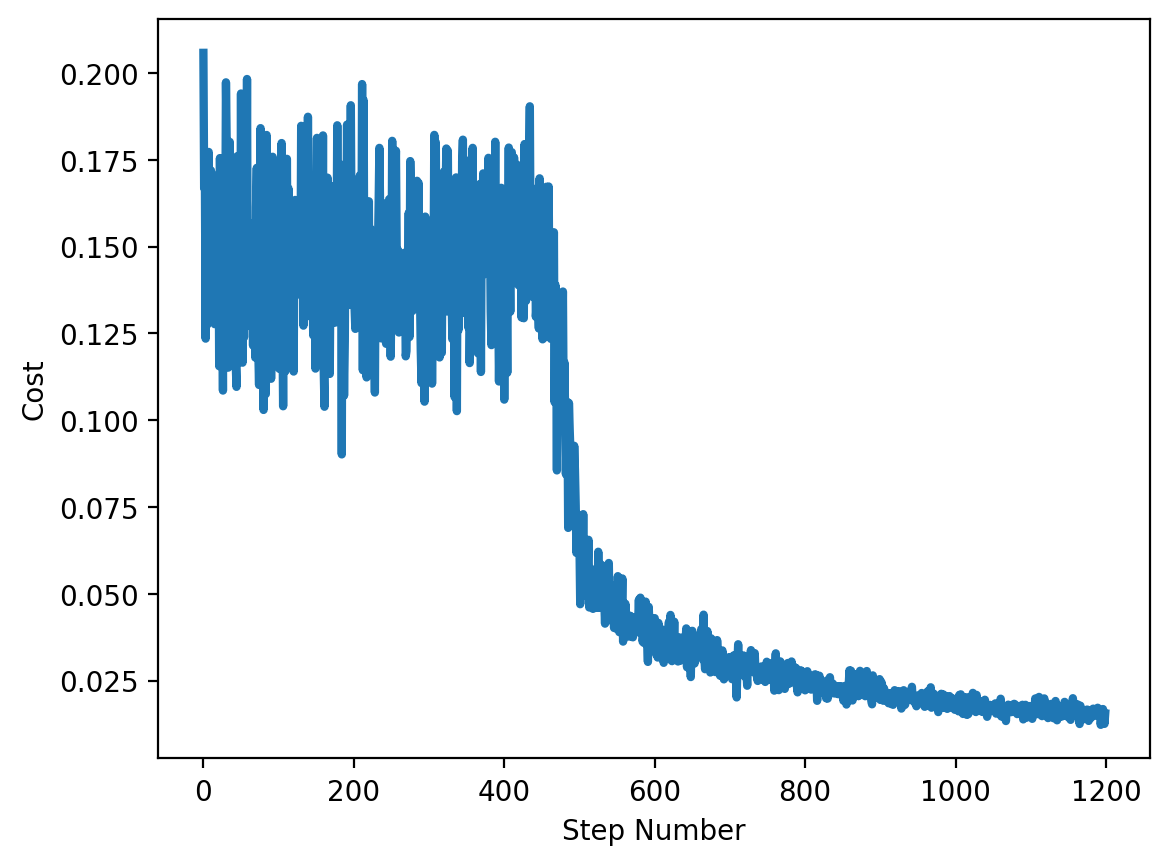

In [ ]:
#Now we can do the actual model training
steps=1200

# note we have limited to 30,000 randomly generated samples so steps*batchsize<30,000

cost,y_target=generate_and_train(model2,circle_generator,img_size=9*3,batchsize=25,steps=steps)

# note that img_size=9*3 = 27 hence we have a 27x27 pixel images as the function generate_and_train include a np.mesh
# function

#Plot the cost
fig, ax = plt.subplots()
stepArray=np.arange(steps)
ax.plot(stepArray,cost,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel("Cost")

## Comment on Previous Failure
Since we are limited to 30,000 randomly generated pixel images, it have been difficult to achieve a cost value of 0.02 when I was using a autoencoder neutral network where all the convolutional neutral layer have the same number of kernel. Therefore, in order to achieve a cost value less than 0.02, I noticed that by adding more kernel to layer which have less nxn pixel (which is near the bottleneck) will significantly reduce the cost value. So the final autoencoder neutral network is a bunch of convolutional neutral network which has a bottleneck shape and the layer closer to the latent space layer have a larger number of kernel. This design is efficient because having more number of kernel near the bottleneck layer rather than at the input or output layer will make the neutral network less computational expensive.

## The Structure of the network
The next line shows the number of neutrons in each layer of the autoencoder neutral network.

In [ ]:
print_layers(model2,y_target)

Layer 0: 2916 neurons /  (25, 27, 27, 4)
Layer 1: 324 neurons /  (25, 9, 9, 4)
Layer 2: 2592 neurons /  (25, 9, 9, 32)
Layer 3: 288 neurons /  (25, 3, 3, 32)
Layer 4: 576 neurons /  (25, 3, 3, 64)
Layer 5: 9 neurons /  (25, 3, 3, 1)
Layer 6: 576 neurons /  (25, 3, 3, 64)
Layer 7: 5184 neurons /  (25, 9, 9, 64)
Layer 8: 324 neurons /  (25, 9, 9, 4)
Layer 9: 2916 neurons /  (25, 27, 27, 4)
Layer 10: 2916 neurons /  (25, 27, 27, 4)
Layer 11: 729 neurons /  (25, 27, 27, 1)


## Performance of the model with bottleneck having less than 9 neutrons
We have achieved a good value for cost which is below the 0.2 target cost. But due to limited sample, the output does recreate the input to some degree but not very well.

In [ ]:
print("The final value of the cost is ",cost[-1])

The final value of the cost is  0.015562111511826515


## An attempt to recreate the input pixel image using the autoencoder neutral network


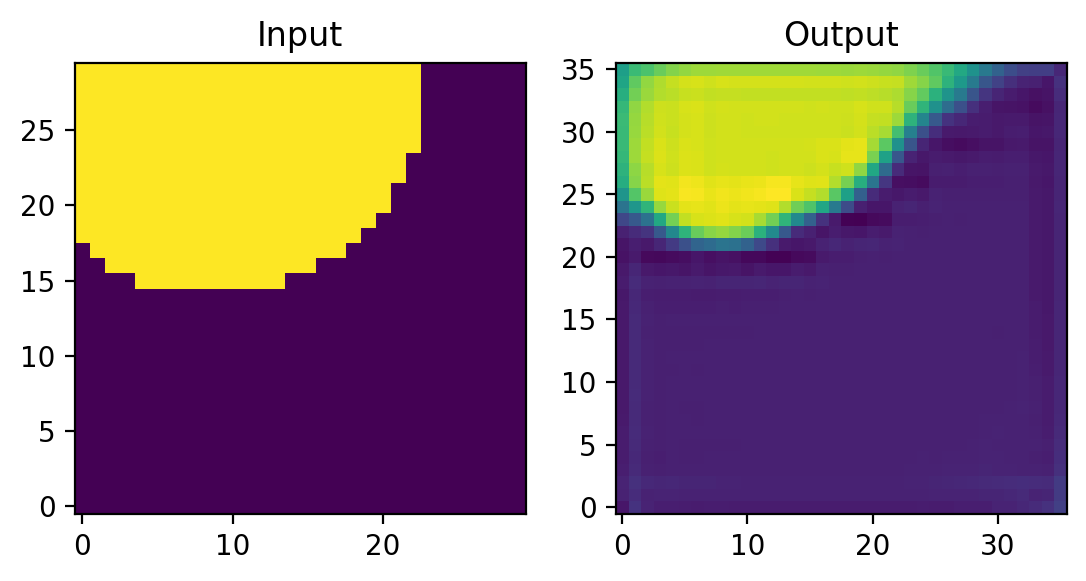

In [ ]:
plot_test_image(model2,circle_generator,30)

# Creating model for Autoencoder
Autoencoder with bottleneck having no more than 3 neutrons

In [ ]:
model3=keras.models.Sequential()
# 3x3 kernel size, 10 channels in first hidden layer:
model3.add(keras.layers.Conv2D(4,5,input_shape=(None,None,1),
               activation="sigmoid",padding='same'))
model3.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model3.add(keras.layers.Conv2D(32,5,
               activation="sigmoid",padding='same'))
model3.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model3.add(keras.layers.Conv2D(64,5,
               activation="relu",padding='same'))
model3.add(keras.layers.Conv2D(1,3,
               activation="sigmoid",padding='same'))
model3.add(keras.layers.AveragePooling2D(pool_size=(3,3),padding='same')) # down
model3.add(keras.layers.UpSampling2D(size=(3,3))) # up
model3.add(keras.layers.Conv2D(64,5,
               activation="relu",padding='same'))
model3.add(keras.layers.UpSampling2D(size=(3,3))) # up
model3.add(keras.layers.Conv2D(4,5,
               activation="sigmoid",padding='same'))
model3.add(keras.layers.UpSampling2D(size=(3,3))) # up
model3.add(keras.layers.Conv2D(4,5,
               activation="sigmoid",padding='same'))
model3.add(keras.layers.Conv2D(1,3,activation="linear",padding='same'))
model3.compile(loss='mean_squared_error',
              optimizer='adam')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, None, None, 4)     104       
                                                                 
 average_pooling2d_5 (Avera  (None, None, None, 4)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, None, None, 32)    3232      
                                                                 
 average_pooling2d_6 (Avera  (None, None, None, 32)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_18 (Conv2D)          (None, None, None, 64)    51264     
                                                                 
 conv2d_19 (Conv2D)          (None, None, None, 1)    

## Model Training
Train the autoencoder model limited to using 30,000 randomly generated samples with using 27x27 pixel image and plot the cost function vs step to see the performance of the model.

Text(0, 0.5, 'Cost')

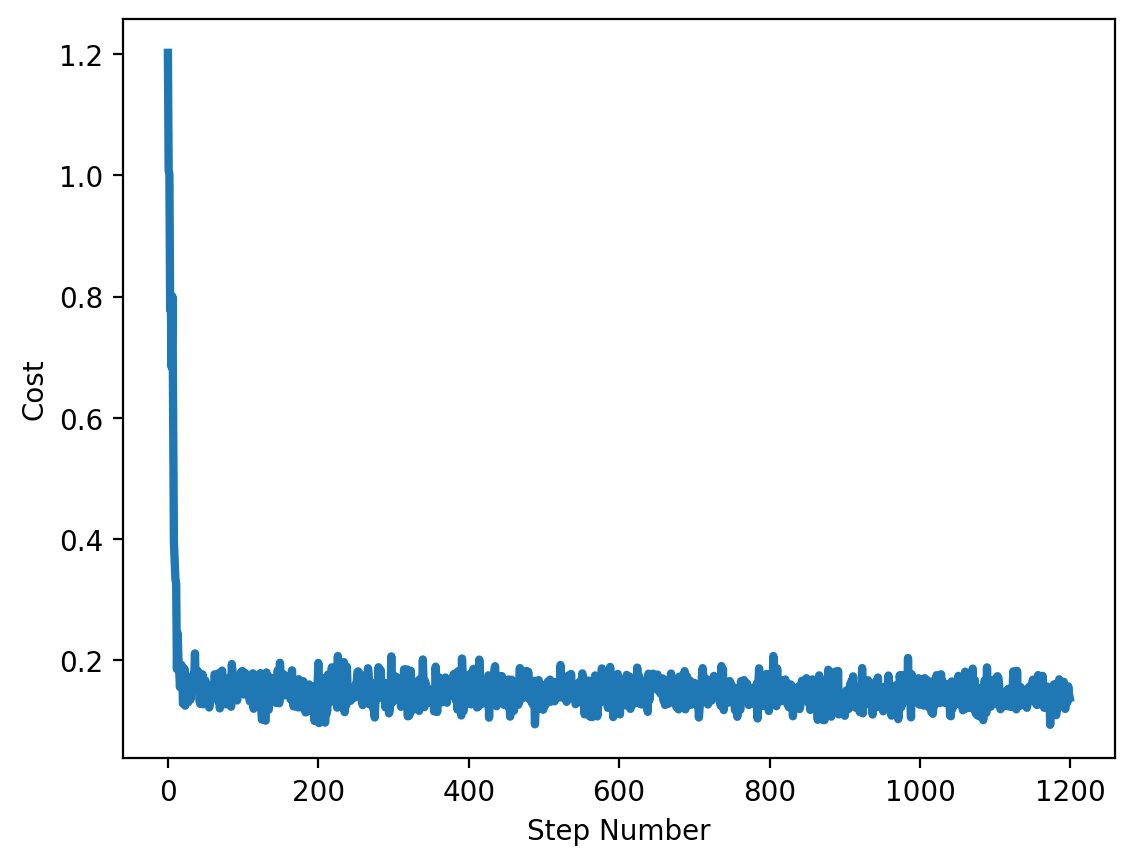

In [ ]:
#Now we can do the actual model training
steps=1200

# note we have limited to 30,000 randomly generated samples so steps*batchsize<30,000

cost2,y_target2=generate_and_train(model3,circle_generator,img_size=9*3,batchsize=25,steps=steps)

# note that img_size=9*3 = 27 hence we have a 27x27 pixel images as the function generate_and_train include a np.mesh
# function

#Plot the cost
fig, ax = plt.subplots()
stepArray=np.arange(steps)
ax.plot(stepArray,cost2,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel("Cost")

## Performance of the autoencoder with bottleneck having less than 3 neutrons


In [ ]:
print("The final value of the cost is ",cost2[-1])

The final value of the cost is  0.11976416409015656


## Recreating the input pixel image using the model

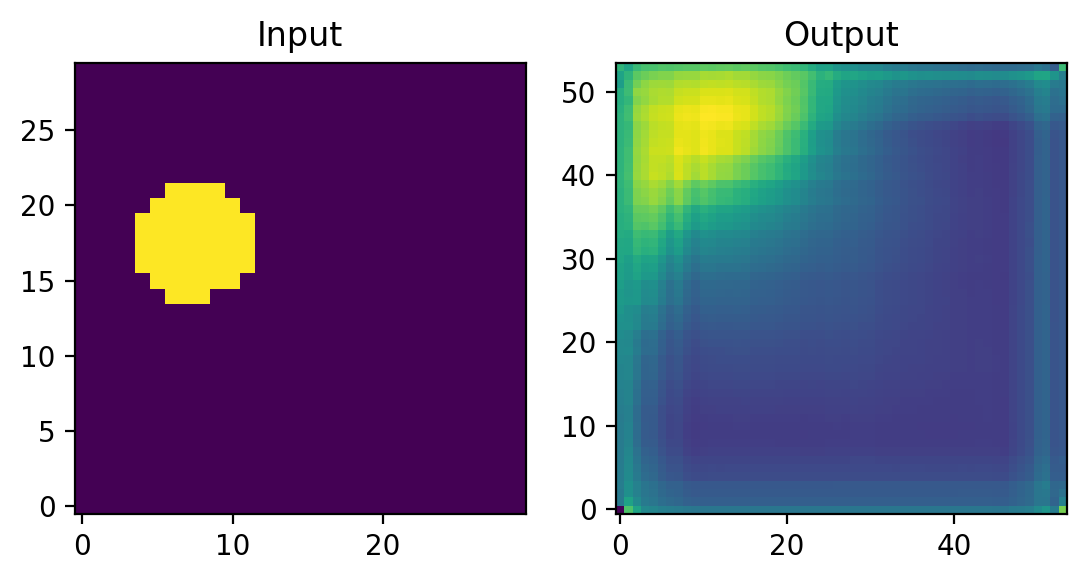

In [ ]:
plot_test_image(model3,circle_generator,30)

## Structure of the autocoder

In [ ]:
print_layers(model3,y_target)

Layer 0: 2916 neurons /  (25, 27, 27, 4)
Layer 1: 324 neurons /  (25, 9, 9, 4)
Layer 2: 2592 neurons /  (25, 9, 9, 32)
Layer 3: 288 neurons /  (25, 3, 3, 32)
Layer 4: 576 neurons /  (25, 3, 3, 64)
Layer 5: 9 neurons /  (25, 3, 3, 1)
Layer 6: 1 neurons /  (25, 1, 1, 1)
Layer 7: 9 neurons /  (25, 3, 3, 1)
Layer 8: 576 neurons /  (25, 3, 3, 64)
Layer 9: 5184 neurons /  (25, 9, 9, 64)
Layer 10: 324 neurons /  (25, 9, 9, 4)
Layer 11: 2916 neurons /  (25, 27, 27, 4)
Layer 12: 2916 neurons /  (25, 27, 27, 4)
Layer 13: 729 neurons /  (25, 27, 27, 1)


## Commenting on the model with bottleneck layer having less than 3 neutrons

Fewer neutrons in the bottleneck layer helps the model to learn the general feature of the input pixel image which helps to prevent overfitting during the model training. However, there is a risk of lossing important information about the input as the input is compressed down to a smaller representation which will leads to poorer reconstruction of the input starting from the latent space.

## Performance of the model with bottleneck layer having less than 3 neutrons
The cost value of the model is around 0.12 which is nearly 10 times as large compare to the bottleneck layer having less than 9 neutrons. This is because the input pixel image is compressed to a pixel image size that is too small (1x1 pixel image) that it is very difficult to recreate the input pixel image. Therefore, the good cost target would be around 0.12 since we have achieve a good cost target of 0.02 using a similar model design before for the model with bottleneck layer having less than 9 neutrons.